### Project Name : Bank Customer Churn Prediction

## Contribution : Individual



The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### Data Dictionary

| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |
|Complain | customer has complaint or not |
|Satisfaction Score | Score provided by the customer for their complaint resolution |
|Card Type | type of card hold by the customer |
|Points Earned | the points earned by the customer for using credit card |


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(palette='colorblind', style='dark')

In [2]:
# load dataset
dataset = '/content/Customer-Churn-Records.csv'

df = pd.read_csv(dataset)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Preprocessing Part 1

In [3]:
# checking shape of dataset
df.shape

(10000, 18)

Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [4]:
# drop columns
drop_col = ['RowNumber', 'CustomerId', 'Surname']

df = df.drop(drop_col, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# renaming column Exited to Churn
df = df.rename(columns={'Exited':'Churn'})

In [6]:
# drop null values ​​if any
df.isnull().sum() * 100 / len(df)

CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Churn                 0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [7]:
# checking duplicated values
df.duplicated().sum()

0

In [8]:
# checking more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Churn               10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [9]:
# grouping col by the dtypes
nums = [i for i in df.columns if df[i].dtypes != 'object']
cats = [i for i in df.columns if df[i].dtypes == 'object']

In [10]:
# descriptive statistics nums col
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
# descriptive statistics cats col
df[cats].describe()

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Explorative Data Analysis (EDA)

In the exploratory data analysis, I will be looking at the distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable.

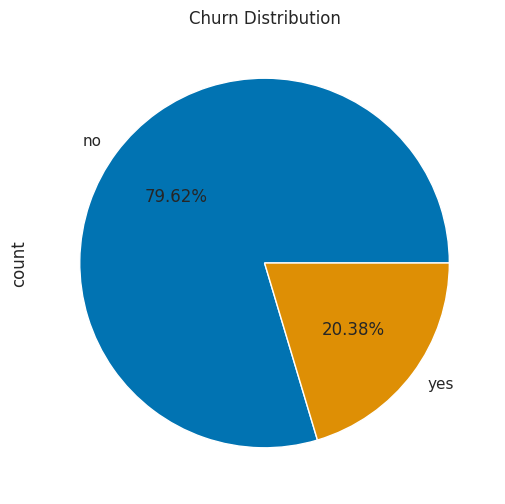

In [13]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['no', 'yes'])
plt.title('Churn Distribution')
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with only 20.38% of the customers churning.

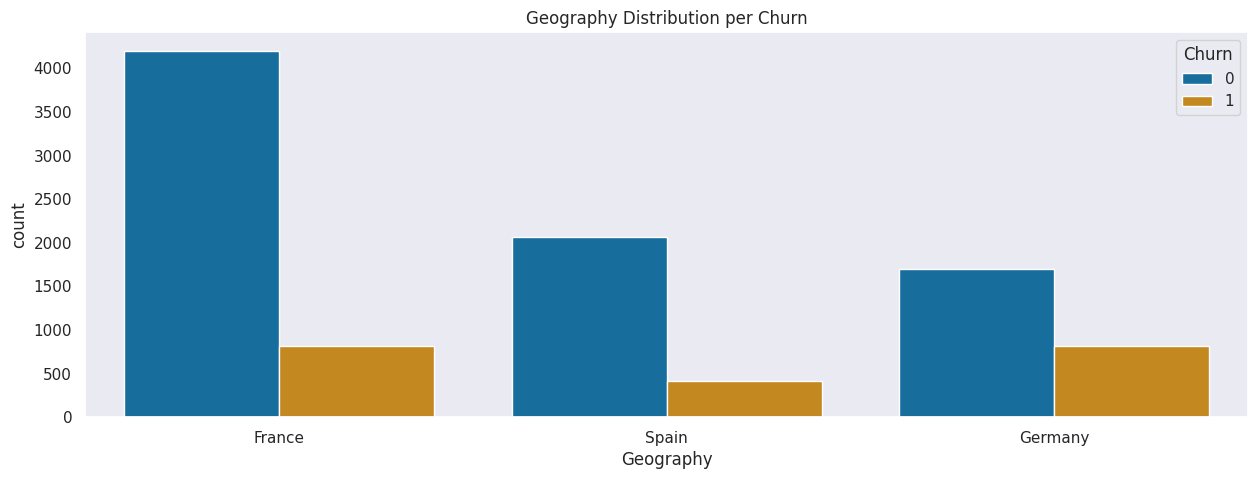

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Geography', hue='Churn')
plt.title('Geography Distribution per Churn')
plt.show()

This graph shows the number of customers of each gender along with the amount of churn. The majority of customers come from France, followed by Spain and Germany. However in contrast to that Germany has the highest number of customer curn followed by France and Spain. From this we can infer that German customers are more likely to churn than the customers from other countries.

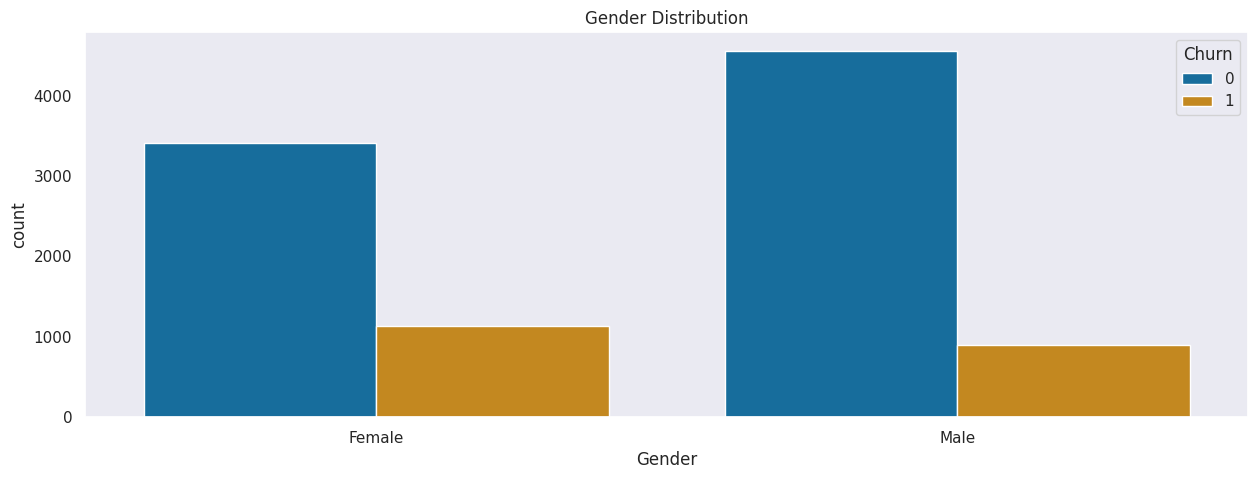

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Gender Distribution')
plt.show()

This graph shows the number of customers of each gender along with the number of churners. The male gender has the largest number of customers, followed by the female gender. From this we can conclude that male customers are more likely to churn than female.

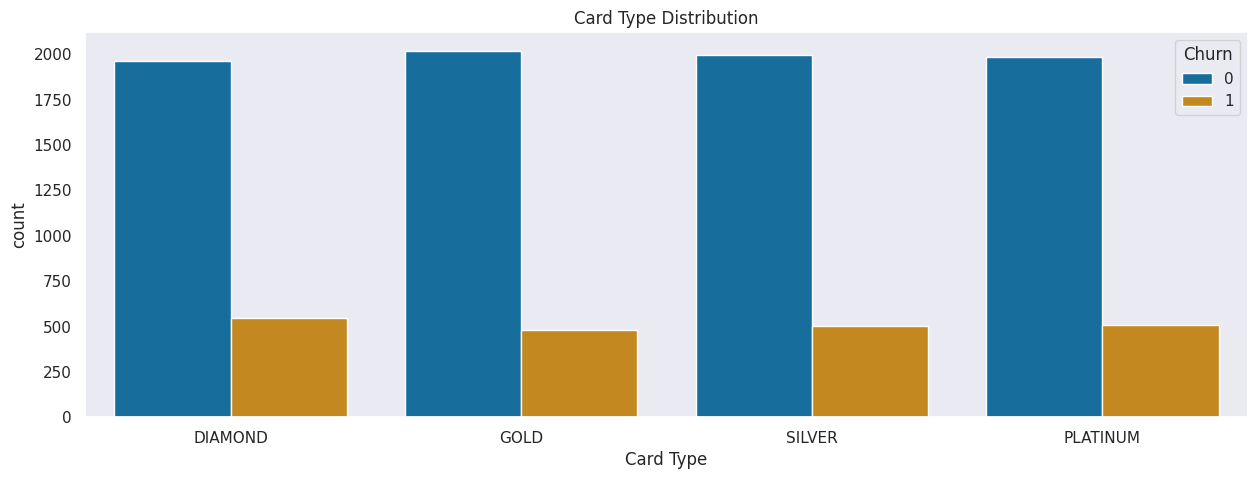

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Card Type', hue='Churn')
plt.title('Card Type Distribution')
plt.show()

The graph above shows the number of customers for various types of cards along with the number of churners. It can be concluded that there is not really a significant difference between the four types of customer cards.

<Axes: xlabel='Churn', ylabel='CreditScore'>

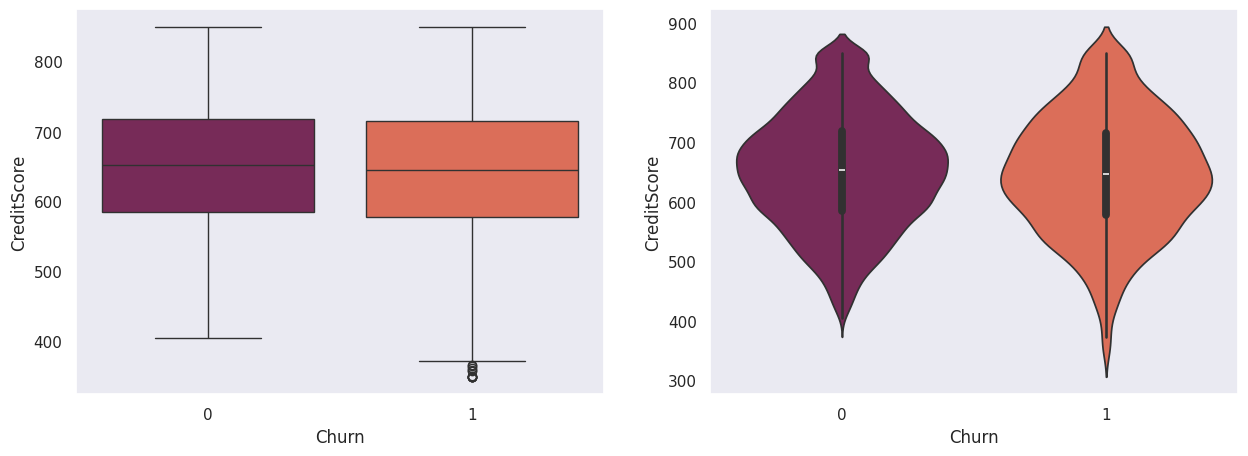

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x='Churn', y='CreditScore', palette='rocket',data=df, ax=ax[0])
sns.violinplot(x='Churn', y='CreditScore', palette='rocket',data=df, ax=ax[1])

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

<Axes: xlabel='Tenure', ylabel='count'>

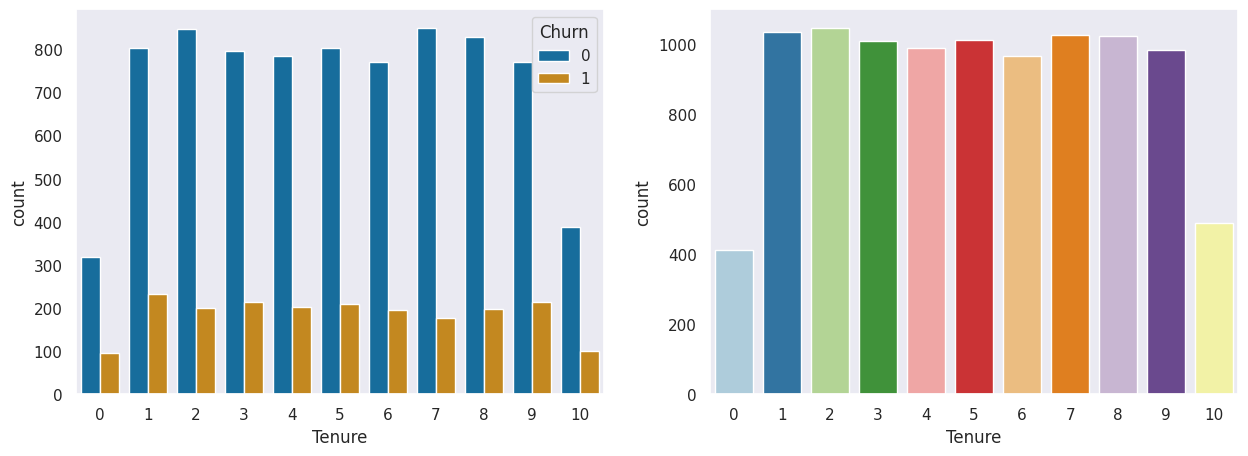

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(data=df, x='Tenure', hue='Churn', ax=ax[0])
sns.countplot(data=df, x='Tenure', ax=ax[1], palette='Paired')

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

<Axes: xlabel='NumOfProducts', ylabel='count'>

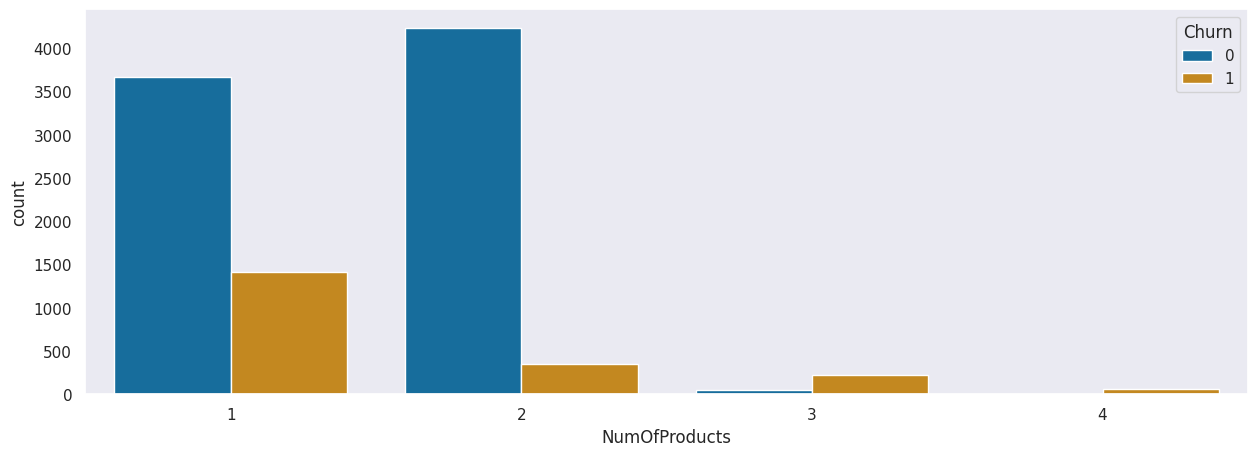

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

In the dataset, we have customers in four categories according to the number of products purchased. The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers.

<Axes: xlabel='HasCrCard', ylabel='count'>

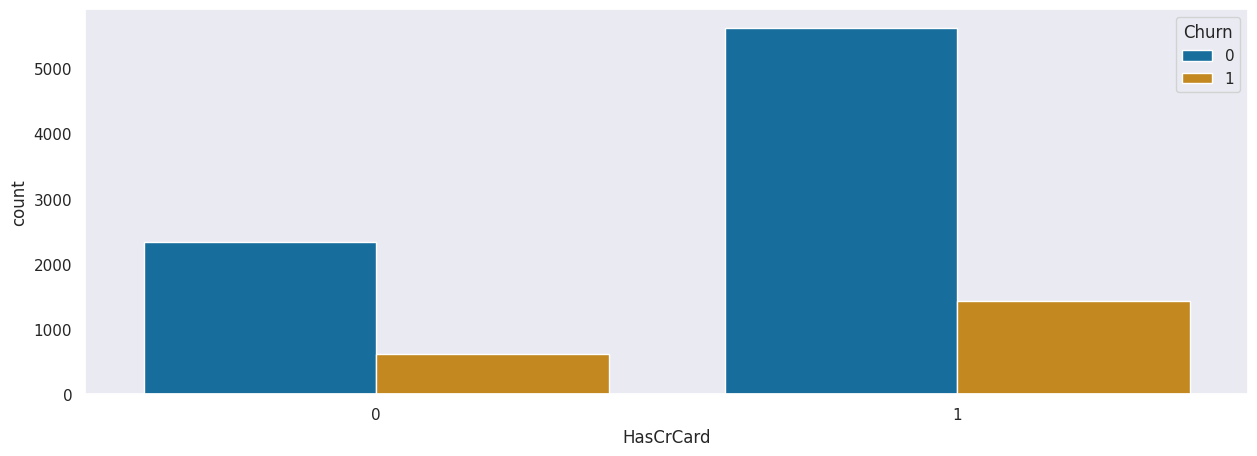

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='HasCrCard',hue='Churn', data=df)

Majoity of the customers have credit cars i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. Moreover, the number of customers leaving the bank are more whom have a credit card.

<Axes: xlabel='Complain', ylabel='count'>

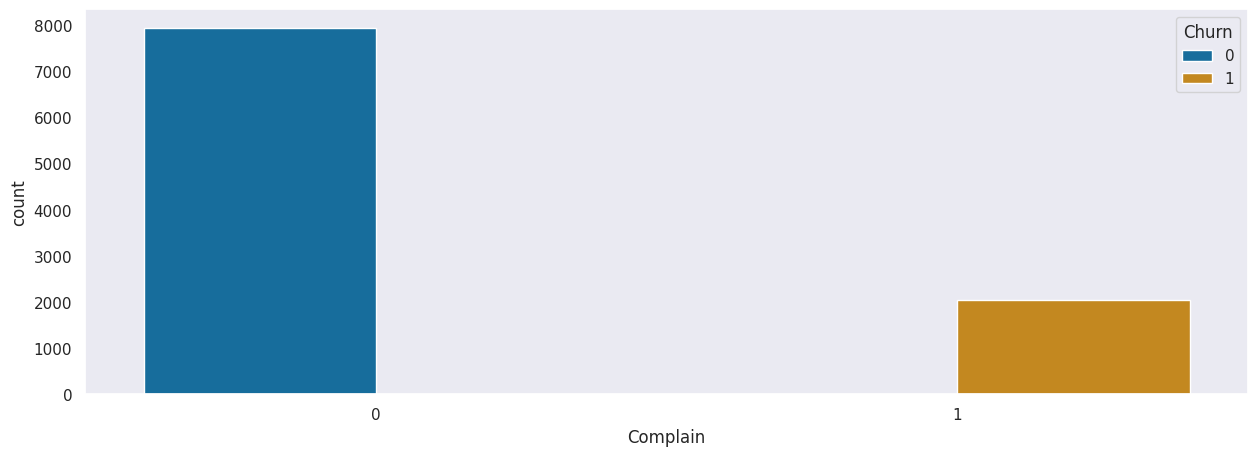

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='Complain',hue='Churn', data=df)

The graph above shows that the number of customers who complain is dominated by customers who have credit cards.

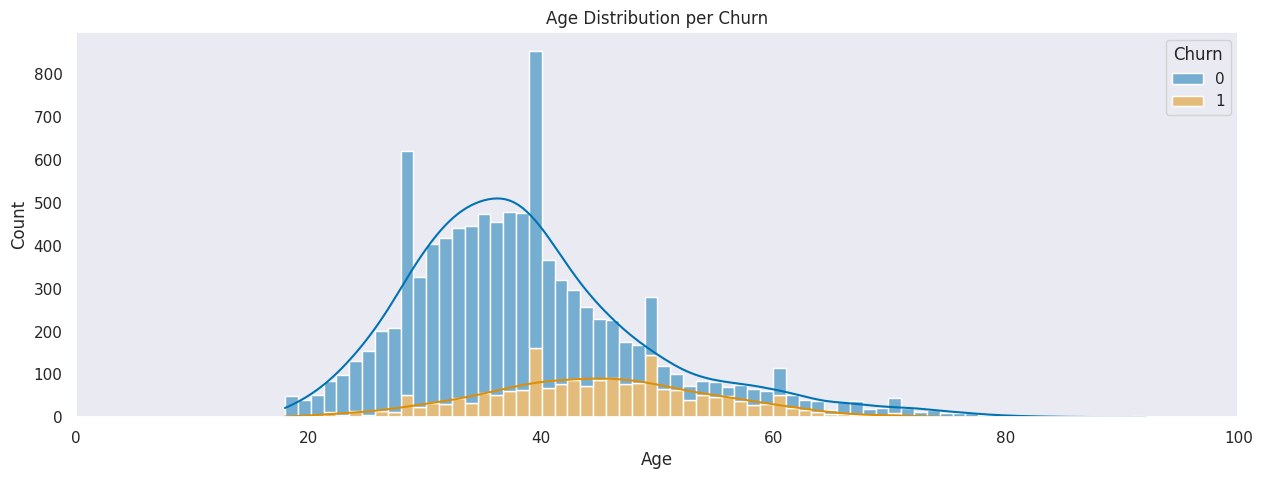

In [22]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Age', hue='Churn', multiple='stack',kde=True)
plt.title('Age Distribution per Churn')
plt.xlim(0,100)
plt.show()

This histtogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

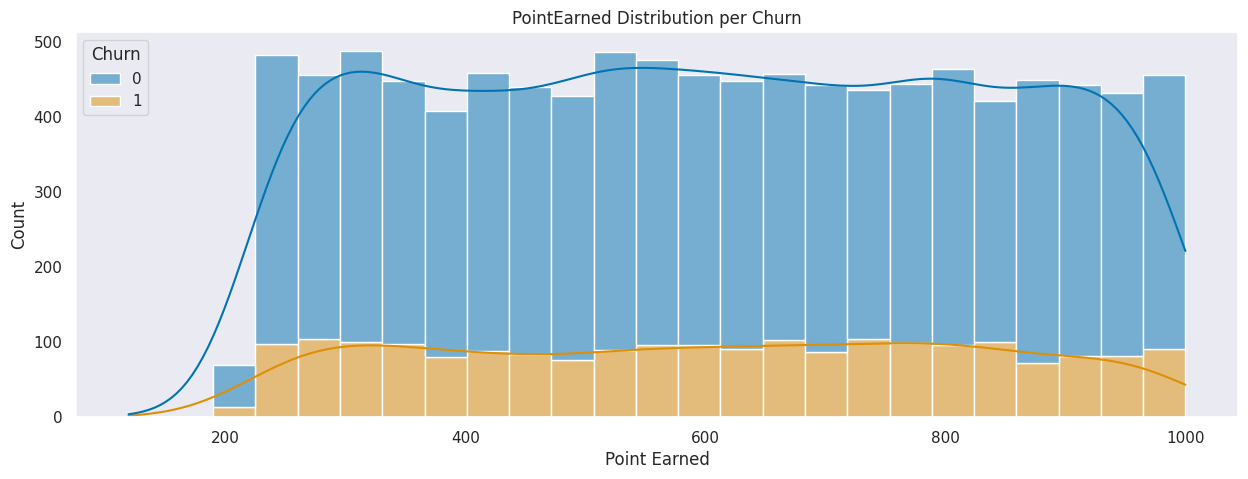

In [23]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Point Earned', hue='Churn', multiple='stack',kde=True)
plt.title('PointEarned Distribution per Churn')
plt.show()

The histogram above visualizes the distribution of points earned and the number of customer churn. The majority of customers who leave are higher around 450. However, yes churn tends to be lower than no.

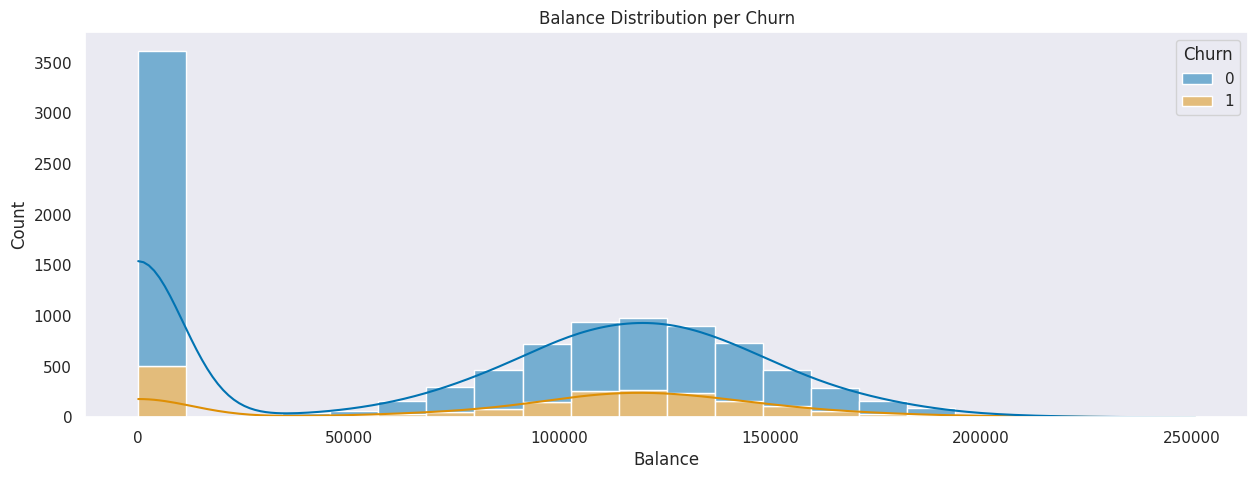

In [24]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Balance', hue='Churn', multiple='stack',kde=True)
plt.title('Balance Distribution per Churn')
plt.show()

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

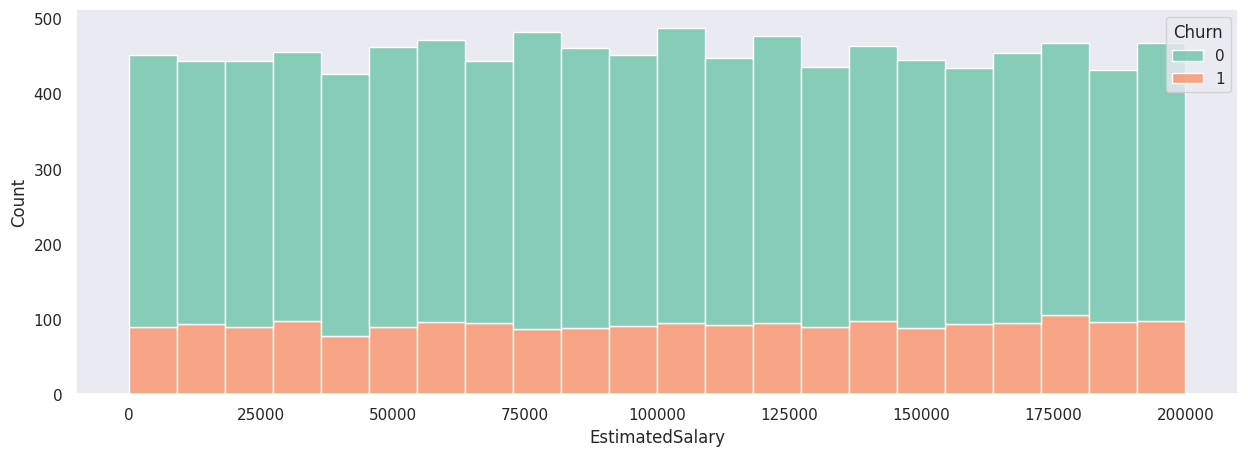

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

## Data Preprocessing Part 2

In [26]:
# label encoding
from sklearn.preprocessing import LabelEncoder

var = ['Geography', 'Gender', 'Card Type']
le = LabelEncoder()

for i in var:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]
Card Type [0 1 3 2]


In [27]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

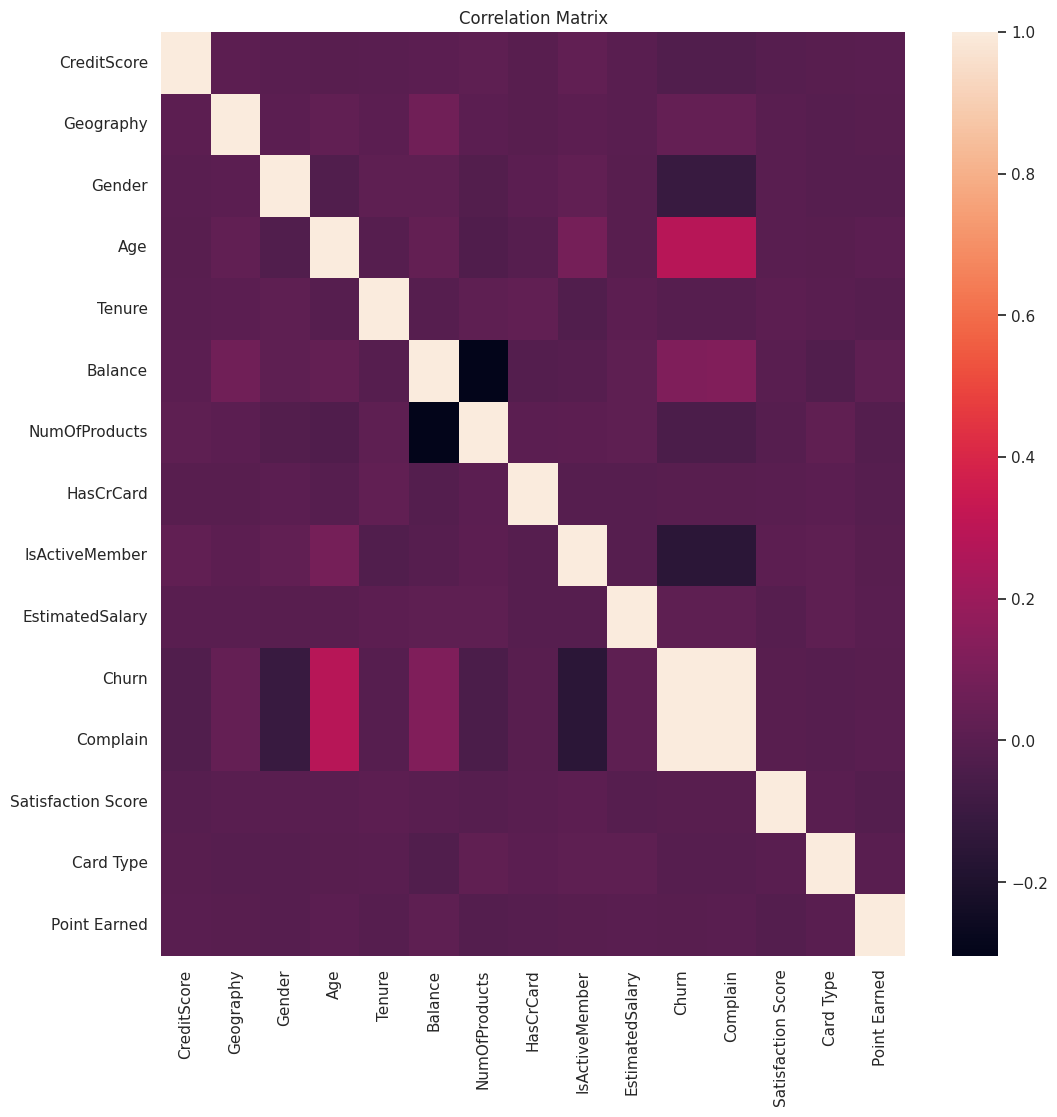

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=False,cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

There is no significant coorelation among the variables.So, I will proceed to model building.

In [29]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned
1500,-0.212407,0,1,50,1,0.087538,1,0,1,-0.634421,1,1,1,1,912
9506,0.325625,0,1,69,6,-1.225848,2,0,1,0.860998,0,0,2,2,547
5927,-0.760786,1,0,43,3,0.824668,1,0,0,0.435603,1,1,3,3,839
482,1.525851,0,1,37,8,-1.225848,3,0,0,0.185941,0,0,4,3,860
1739,0.667069,0,1,23,7,1.005525,2,1,0,-0.609181,0,0,1,0,385


In [30]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For predicting the churn of customers, depending on the data of the customers, we will use the following models:


- Decision Tree Classifier
- Random Forest Classifier

### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#creating Decision Tree Classifer object
dtr = DecisionTreeClassifier()

#defining parameter range
params = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Creating grid search object
grid_dtr = GridSearchCV(dtr, param_grid=params, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

#Fitting the grid search object to the training data
grid_dtr.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtr.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [33]:
dtr = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 6, min_samples_split= 2, random_state= 0)

# fitting the model
dtr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, random_state=0)

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
params = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid=params, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [35]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 2, min_samples_split= 2, random_state= 0)

# fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

predicting the customer churn usng dtr and rfc

In [36]:
# training accuracy
print('training accuracy: ',dtr.score(X_train,y_train))

print()

# testing accuracy
print('testing accuracy: ', dtr.score(X_test,y_test))

training accuracy:  0.9985

testing accuracy:  0.999


In [37]:
# decision tree classifier
dtr_pred = dtr.predict(X_test)

In [38]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

print()

# testing accuracy
print('testing accuracy: ', rfc.score(X_test, y_test))

Training accuracy:  0.9985

testing accuracy:  0.999


In [39]:
# random forest classifier
rfc_pred = rfc.predict(X_test)

## Model Evaluation

### Decision Tree Classifier

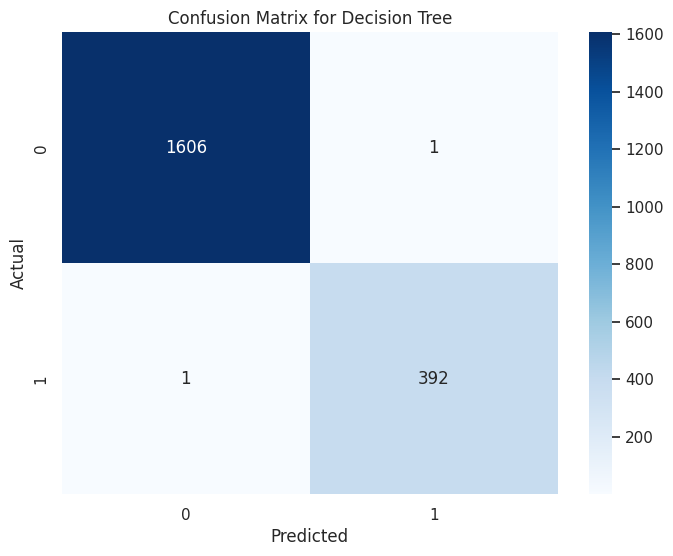

In [40]:
# confusion matrix heatmap
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtr_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

<Axes: xlabel='Churn', ylabel='Density'>

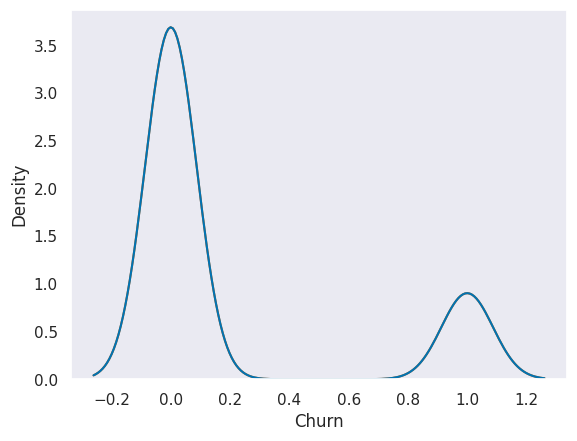

In [41]:
# distribution plot
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(dtr_pred, hist=False, color='b', label='Fitted Values' , ax=ax)

the resulting plots apparently overlap, that shows that the model is very accurate lol.

In [42]:
# classification report
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, r2_score

print('Decision Tree Classifier: \n', classification_report(y_test, dtr_pred))
print('Accuracy Model Decision Tree Classifier : {:.2f}%'.format(accuracy_score(y_test, dtr_pred) * 100))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtr_pred))
print("R2 Score: ", r2_score(y_test, dtr_pred))

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Model Decision Tree Classifier : 99.90%
Mean Absolute Error:  0.001
R2 Score:  0.9936663864042651


### Random Forest Classifier

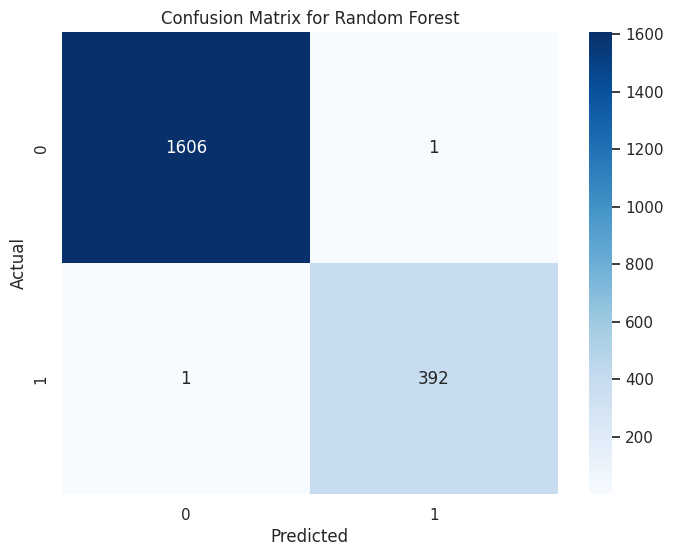

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

<Axes: xlabel='Churn', ylabel='Density'>

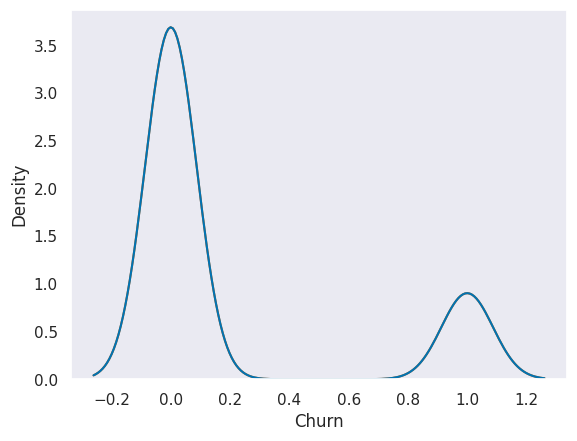

In [44]:
# distribution plot
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(rfc_pred, hist=False, color='b', label='Fitted Values' , ax=ax)

The accuracy model almost same like decision tree classifier lmao

In [45]:
# classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Accuracy Model Random Forest Classifier : {:.2f}%'.format(accuracy_score(y_test, rfc_pred) * 100))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Model Random Forest Classifier : 99.90%
Mean Absolute Error:  0.001
R2 Score:  0.9936663864042651


## Conclusion

Both the models were hyperparameter tuned using GridSearchCV. Both the models have equal accuracy score its weird. You can use a method other than the one I used for GridSearchCV, maybe there will be a slight difference, but the hyperparameter tuning process is faster using the Decision Tree Classifier.